In [18]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_middle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [19]:
data

['t_n103        42.0402 (35.0309, 45.5446) (35.8472, 45.9171) 10.0699 (Jnode 202)\n',
 't_n104        38.2722 (31.3126, 43.8323) (31.9272, 44.2920) 12.3648 (Jnode 201)\n',
 't_n105        37.2721 (30.4713, 42.7351) (30.9627, 43.0820) 12.1193 (Jnode 200)\n',
 't_n106        33.6062 (27.3974, 38.7505) (27.7770, 39.0360) 11.2589 (Jnode 199)\n',
 't_n107        32.7762 (26.7086, 37.8256) (27.0314, 38.0713) 11.0398 (Jnode 198)\n',
 't_n108        30.8785 (25.1251, 35.7646) (25.4157, 36.0119) 10.5962 (Jnode 197)\n',
 't_n109        18.0276 (14.2300, 21.6406) (14.3148, 21.7134)  7.3986 (Jnode 196)\n',
 't_n110        17.8981 (14.1289, 21.4923) (14.2044, 21.5630)  7.3586 (Jnode 195)\n',
 't_n111        17.5181 (13.8212, 21.0501) (13.8648, 21.0865)  7.2217 (Jnode 194)\n',
 't_n112        17.0262 (13.4200, 20.4837) (13.5097, 20.5686)  7.0588 (Jnode 193)\n',
 't_n113        16.2790 (12.8112, 19.6128) (12.9037, 19.7037)  6.8000 (Jnode 192)\n',
 't_n114        12.1621 ( 9.2669, 15.1383) ( 9.1991, 1

In [20]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [21]:
model1_mean_times = {}
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    model1_mean_times[int(line[0][3:])] = float(line[1])
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [22]:
model1_mean_times

{103: 42.0402,
 104: 38.2722,
 105: 37.2721,
 106: 33.6062,
 107: 32.7762,
 108: 30.8785,
 109: 18.0276,
 110: 17.8981,
 111: 17.5181,
 112: 17.0262,
 113: 16.279,
 114: 12.1621,
 115: 3.6367,
 116: 9.189,
 117: 7.557,
 118: 12.8267,
 119: 10.7855,
 120: 16.8271,
 121: 16.2016,
 122: 9.4353,
 123: 13.0126,
 124: 10.8627,
 125: 11.4285,
 126: 15.8383,
 127: 14.8839,
 128: 4.1057,
 129: 17.1827,
 130: 15.599,
 131: 11.2886,
 132: 10.4869,
 133: 8.8917,
 134: 12.2714,
 135: 9.8078,
 136: 8.6403,
 137: 29.6685,
 138: 23.0583,
 139: 31.2794,
 140: 28.4637,
 141: 26.53,
 142: 20.6819,
 143: 17.9946,
 144: 15.9548,
 145: 13.4888,
 146: 21.9391,
 147: 11.608,
 148: 26.0959,
 149: 23.9356,
 150: 6.0314,
 151: 2.7098,
 152: 35.186,
 153: 31.3341,
 154: 25.6628,
 155: 19.9394,
 156: 21.4529,
 157: 33.0144,
 158: 28.6432,
 159: 29.7883,
 160: 37.0866,
 161: 31.5822,
 162: 34.7696,
 163: 31.343,
 164: 10.7571,
 165: 31.4045,
 166: 29.8229,
 167: 25.1937,
 168: 16.8715,
 169: 22.3581,
 170: 19.3179,

In [23]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [24]:
posterior_mean_iqtree

[42.0402,
 38.2722,
 37.2721,
 33.6062,
 32.7762,
 30.8785,
 18.0276,
 17.8981,
 17.5181,
 17.0262,
 16.279,
 12.1621,
 3.6367,
 9.189,
 7.557,
 12.8267,
 10.7855,
 16.8271,
 16.2016,
 9.4353,
 13.0126,
 10.8627,
 11.4285,
 15.8383,
 14.8839,
 4.1057,
 17.1827,
 15.599,
 11.2886,
 10.4869,
 8.8917,
 12.2714,
 9.8078,
 8.6403,
 29.6685,
 23.0583,
 31.2794,
 28.4637,
 26.53,
 20.6819,
 17.9946,
 15.9548,
 13.4888,
 21.9391,
 11.608,
 26.0959,
 23.9356,
 6.0314,
 2.7098,
 35.186,
 31.3341,
 25.6628,
 19.9394,
 21.4529,
 33.0144,
 28.6432,
 29.7883,
 37.0866,
 31.5822,
 34.7696,
 31.343,
 10.7571,
 31.4045,
 29.8229,
 25.1937,
 16.8715,
 22.3581,
 19.3179,
 18.6215,
 18.2393,
 17.3572,
 15.7738,
 15.1785,
 14.622,
 13.8253,
 12.7683,
 11.788,
 10.187,
 7.0834,
 13.0209,
 11.5887,
 10.3173,
 14.038,
 12.7876,
 12.065,
 9.6649,
 10.8913,
 12.5772,
 11.0053,
 9.2848,
 15.0888,
 13.3378,
 14.4365,
 13.7344,
 12.2208,
 9.2082,
 8.6747,
 7.11,
 2.4471,
 18.8168,
 15.8764]

In [25]:
lower_ci_iqtree

[]

In [26]:
upper_ci_iqtree

[]

In [27]:
file_LG = open("LG_G4_PM_codeml_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

model2_mean_times = {}
        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    model2_mean_times[int(line[0][3:])] = float(line[1])
    
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [28]:
model2_mean_times

{103: 40.1531,
 104: 31.6516,
 105: 30.3918,
 106: 28.0769,
 107: 27.3165,
 108: 26.0648,
 109: 14.2132,
 110: 14.1316,
 111: 13.8139,
 112: 13.1884,
 113: 12.6567,
 114: 9.7255,
 115: 2.4368,
 116: 6.9033,
 117: 4.9004,
 118: 9.5972,
 119: 8.3134,
 120: 13.1631,
 121: 12.6484,
 122: 6.7772,
 123: 9.9598,
 124: 8.1908,
 125: 8.5235,
 126: 12.2886,
 127: 11.4646,
 128: 3.6529,
 129: 13.3139,
 130: 12.0928,
 131: 8.2141,
 132: 7.3521,
 133: 5.8271,
 134: 9.6862,
 135: 7.7153,
 136: 4.8985,
 137: 24.3758,
 138: 21.0249,
 139: 25.9066,
 140: 23.7658,
 141: 22.0359,
 142: 18.2641,
 143: 15.7953,
 144: 14.0417,
 145: 11.7728,
 146: 18.6086,
 147: 11.1906,
 148: 22.1485,
 149: 20.1025,
 150: 5.4767,
 151: 2.4397,
 152: 28.0524,
 153: 25.015,
 154: 21.3785,
 155: 17.0677,
 156: 17.7759,
 157: 26.4047,
 158: 23.3996,
 159: 24.0447,
 160: 30.6757,
 161: 28.8066,
 162: 25.3461,
 163: 11.3574,
 164: 26.0694,
 165: 24.1977,
 166: 21.3046,
 167: 18.5327,
 168: 16.3599,
 169: 26.2955,
 170: 17.1817,


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [30]:
posterior_mean_baseml

[40.1531,
 31.6516,
 30.3918,
 28.0769,
 27.3165,
 26.0648,
 14.2132,
 14.1316,
 13.8139,
 13.1884,
 12.6567,
 9.7255,
 2.4368,
 6.9033,
 4.9004,
 9.5972,
 8.3134,
 13.1631,
 12.6484,
 6.7772,
 9.9598,
 8.1908,
 8.5235,
 12.2886,
 11.4646,
 3.6529,
 13.3139,
 12.0928,
 8.2141,
 7.3521,
 5.8271,
 9.6862,
 7.7153,
 4.8985,
 24.3758,
 21.0249,
 25.9066,
 23.7658,
 22.0359,
 18.2641,
 15.7953,
 14.0417,
 11.7728,
 18.6086,
 11.1906,
 22.1485,
 20.1025,
 5.4767,
 2.4397,
 28.0524,
 25.015,
 21.3785,
 17.0677,
 17.7759,
 26.4047,
 23.3996,
 24.0447,
 30.6757,
 28.8066,
 25.3461,
 11.3574,
 26.0694,
 24.1977,
 21.3046,
 18.5327,
 16.3599,
 26.2955,
 17.1817,
 16.3453,
 15.7691,
 15.418,
 14.0035,
 13.3914,
 12.9282,
 12.1439,
 11.2286,
 10.2815,
 8.916,
 6.4489,
 11.1303,
 10.1989,
 9.2243,
 12.3731,
 11.133,
 10.4031,
 8.5406,
 9.3631,
 11.0065,
 9.6819,
 8.0317,
 13.2682,
 11.6328,
 12.5821,
 11.5916,
 10.3621,
 7.7388,
 7.5596,
 4.7174,
 1.7087,
 16.178,
 14.1026]

In [31]:
posterior_mean_iqtree

[42.0402,
 38.2722,
 37.2721,
 33.6062,
 32.7762,
 30.8785,
 18.0276,
 17.8981,
 17.5181,
 17.0262,
 16.279,
 12.1621,
 3.6367,
 9.189,
 7.557,
 12.8267,
 10.7855,
 16.8271,
 16.2016,
 9.4353,
 13.0126,
 10.8627,
 11.4285,
 15.8383,
 14.8839,
 4.1057,
 17.1827,
 15.599,
 11.2886,
 10.4869,
 8.8917,
 12.2714,
 9.8078,
 8.6403,
 29.6685,
 23.0583,
 31.2794,
 28.4637,
 26.53,
 20.6819,
 17.9946,
 15.9548,
 13.4888,
 21.9391,
 11.608,
 26.0959,
 23.9356,
 6.0314,
 2.7098,
 35.186,
 31.3341,
 25.6628,
 19.9394,
 21.4529,
 33.0144,
 28.6432,
 29.7883,
 37.0866,
 31.5822,
 34.7696,
 31.343,
 10.7571,
 31.4045,
 29.8229,
 25.1937,
 16.8715,
 22.3581,
 19.3179,
 18.6215,
 18.2393,
 17.3572,
 15.7738,
 15.1785,
 14.622,
 13.8253,
 12.7683,
 11.788,
 10.187,
 7.0834,
 13.0209,
 11.5887,
 10.3173,
 14.038,
 12.7876,
 12.065,
 9.6649,
 10.8913,
 12.5772,
 11.0053,
 9.2848,
 15.0888,
 13.3378,
 14.4365,
 13.7344,
 12.2208,
 9.2082,
 8.6747,
 7.11,
 2.4471,
 18.8168,
 15.8764]

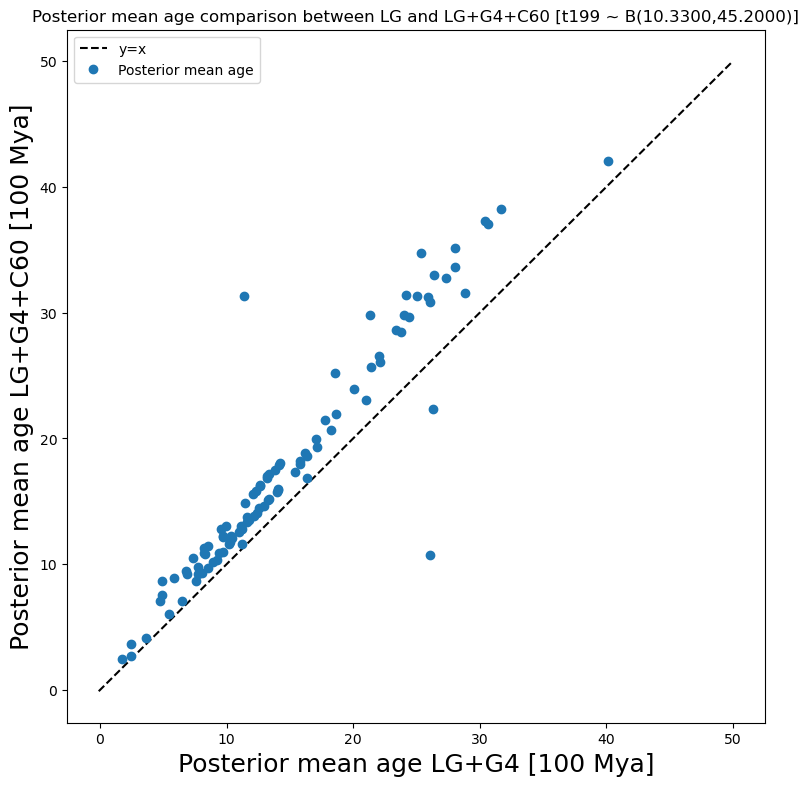

In [32]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()


In [33]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')

In [34]:
import copy
from ete3 import Tree

iqtree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4.tree"
mcmctree_file = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_C60.tree"

tree_iqtree = Tree(iqtree_file)

iqtree_node_traversal = []
for node in tree_iqtree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    iqtree_node_traversal.append(node.name)

tree_mcmctree = Tree(mcmctree_file)

mcmctree_node_traversal = []
for node in tree_mcmctree.traverse("preorder"):
    edge = node.get_edges()[0]
    clade_1 = list(edge[0])
    clade_2 = list(edge[1])
    node_name = clade_1 + clade_2
    node_name = [node.name for node in node_name]
    # node_name.sort()
    node_name = ':'.join(node_name)
    node.name = node_name
    mcmctree_node_traversal.append(node.name)



In [35]:
iqtree_node_traversal

['Volvox:Oryza_sativa:Phytophthora_ramorum:Nanosalina:Reticulomyxa:Archaeoglobus_fulgidus:Rhodopirellula_baltica:Chlamydia_trachomatis:Elphidium:Ar13:Dictyoglomus:Ar5:Caldisericum:Rhodopseudomonas_palustris:Kosmotoga:Fibrobacter:Thalassiosira_pseudonana:Thermodesulfovibrio:Caldivirga_maquilingensis:Staphylothermus_marinus:DUSEL3:Hydra:Chlamydomonas:Methanococcus_jannaschii:Physcomitrella:Ectocarpus:Bodo:Nanoarchaeum:Micrarchaeum_acidiphilum:Pyrobaculum_aerophilum:Methanothermobacter_thermautotro:Batrachochytrium:Arabidopsis_thaliana:Amphimedon:Ar15:Nitrosoarchaeum_limnia:Parvarchaeum_acidophilus:Homo_sapiens:Leishmania_major:Ar6:Chlorobium:Haloarcula_marismortui:Thermoplasma_volcanium:Methanomassiliicoccus_luminyensis:Cyanidioschyzon:Ignicoccus_hospitalis:Chondrus:Giardia_lamblia:Methanopyrus_kandleri:Verrucomicrobium:Nanosalinarum:Lentisphaera:Nitrosopumilus_maritimus:DUSEL4:Hyperthermus_butylicus:Loki3:Thermodesulfatator:Korarchaeum_cryptofilum:Caldiarchaeum_subterraneum:Desulfurispi

In [36]:
mcmctree_node_traversal

['Volvox:Chlamydia_trachomatis:Giardia_lamblia:Bodo:Leishmania_major:Limulus:Trichomonas_vaginalis:Homo_sapiens:Chlorogloeopsis:Cenarchaeum_symbiosum:Fibrobacter:Paramecium:Tetrahymena:Nanosalina:The09:Acidobacterium:Ectocarpus:Pyrobaculum_aerophilum:Thalassiosira_pseudonana:Crenynpffa:Latescibacteria:Phytophthora_ramorum:Caldivirga_maquilingensis:Verrucomicrobium:Thermofilum_pendens:Nanoarchaeum:Parcubacteria:Sulfolobus_solfataricus:Clostridium_acetobutylicum:Hyperthermus_butylicus:Staphylothermus_marinus:Synechocystis_sp._PCC6803:Campylobacter_jejuni:Rhodopirellula_baltica:Oryza_sativa:Ignicoccus_hospitalis:Gloeobacter:Chlamydomonas:Loki3:Escherichia_coli:Aeropyrum_pernix:Lokiarchaeum:Arabidopsis_thaliana:Loki2:Physcomitrella:Thermodesulfatator:Agaricus:Parvarchaeum_acidophilus:Chondrus:Cyanidioschyzon:Galdieria:Cyanophora:Saccharomyces_cerevisiae:Kosmotoga:Rhodopseudomonas_palustris:Cylindrosperopsis:Reticulomyxa:Rickettsia:Elphidium:Hydra:Korarchaeum_cryptofilum:Chthonomonas:Desulf

In [37]:
LG_G4_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_times_index.tree"
LG_G4_C60_index_tree = "/home/piyumal/PHD/TimeTree/TreeMatching2/date_testing/eucaryote-origin/complex-models-v3/LG_G4_C60_times_index.tree"
# Load the tree using ETE3
tree1 = Tree(LG_G4_index_tree)
tree2 = Tree(LG_G4_C60_index_tree)


# Function to traverse the tree and populate the dictionary
def traverse_and_collect(node, clade_values):
    if not node.is_leaf():
        clade_name = node.name if node.name else "root"
        # Retrieve the support value (if exists)
        if clade_name == "root":
            clade_name = "root:1"
        support_value = node.support if node.support else None
        clade_values[clade_name] = support_value
        for child in node.get_children():
            # print(child)
            # print(child.get_leaf_names())
            child_names = child.get_leaf_names()
            cleaned_child_names = ["_".join(name.split('_')[1:]) for name in child_names]
            cleaned_child_names.sort()
            final_child_name = ":".join(cleaned_child_names)+":"+str(len(cleaned_child_names))
            support_value = node.support if node.support else None
            # print(support_value)
            clade_values[final_child_name] = support_value
            traverse_and_collect(child, clade_values)



In [38]:
# Start the traversal from the root
clade_values_tree1 = {}

traverse_and_collect(tree1, clade_values_tree1)

# Display the clade names with their associated values
for clade, value in clade_values_tree1.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 203.0
Clade: Aeropyrum_pernix:Agaricus:Amphimedon:Ar13:Ar15:Ar5:Ar6:Arabidopsis_thaliana:Archaeoglobus_fulgidus:Batrachochytrium:Bodo:Caldiarchaeum_subterraneum:Caldivirga_maquilingensis:Cenarchaeum_symbiosum:Chlamydomonas:Chondrus:Crenynpffa:Cyanidioschyzon:Cyanophora:DUSEL3:DUSEL4:Dictyostelium_discoideum:Ectocarpus:Elphidium:Galdieria:Giardia_lamblia:Haloarcula_marismortui:Homo_sapiens:Hydra:Hyperthermus_butylicus:Ignicoccus_hospitalis:Korarchaeum_cryptofilum:Leishmania_major:Limulus:Loki2:Loki3:Lokiarchaeum:Methanococcus_jannaschii:Methanomassiliicoccus_luminyensis:Methanopyrus_kandleri:Methanosarcina_mazei:Methanothermobacter_thermautotro:Micrarchaeum_acidiphilum:Nanoarchaeum:Nanosalina:Nanosalinarum:Nitrosoarchaeum_limnia:Nitrosopumilus_maritimus:Oryza_sativa:Paramecium:Parvarchaeum_acidophilus:Physcomitrella:Phytophthora_ramorum:Polysphondylium:Pyrobaculum_aerophilum:Pyrococcus_furiosus:Reticulomyxa:Saccharomyces_cerevisiae:Staphylothermus_marinus:S

In [39]:
# Start the traversal from the root
clade_values_tree2 = {}

traverse_and_collect(tree2, clade_values_tree2)

# Display the clade names with their associated values
for clade, value in clade_values_tree2.items():
    print(f"Clade: {clade}, Support Value: {value}")

Clade: root:1, Support Value: 203.0
Clade: Aeropyrum_pernix:Agaricus:Amphimedon:Ar13:Ar15:Ar5:Ar6:Arabidopsis_thaliana:Archaeoglobus_fulgidus:Batrachochytrium:Bodo:Caldiarchaeum_subterraneum:Caldivirga_maquilingensis:Cenarchaeum_symbiosum:Chlamydomonas:Chondrus:Crenynpffa:Cyanidioschyzon:Cyanophora:DUSEL3:DUSEL4:Dictyostelium_discoideum:Ectocarpus:Elphidium:Galdieria:Giardia_lamblia:Haloarcula_marismortui:Homo_sapiens:Hydra:Hyperthermus_butylicus:Ignicoccus_hospitalis:Korarchaeum_cryptofilum:Leishmania_major:Limulus:Loki2:Loki3:Lokiarchaeum:Methanococcus_jannaschii:Methanomassiliicoccus_luminyensis:Methanopyrus_kandleri:Methanosarcina_mazei:Methanothermobacter_thermautotro:Micrarchaeum_acidiphilum:Nanoarchaeum:Nanosalina:Nanosalinarum:Nitrosoarchaeum_limnia:Nitrosopumilus_maritimus:Oryza_sativa:Paramecium:Parvarchaeum_acidophilus:Physcomitrella:Phytophthora_ramorum:Polysphondylium:Pyrobaculum_aerophilum:Pyrococcus_furiosus:Reticulomyxa:Saccharomyces_cerevisiae:Staphylothermus_marinus:S

In [40]:
diff_indexes = []
for clade, value in clade_values_tree1.items():
    names = clade.split(":")
    len_of_clade = int(names[-1])
    for clade2, value2 in clade_values_tree2.items():
        names2 = clade2.split(":")
        len_of_clade2 = int(names2[-1])
        if clade == clade2 and value != value2:
           print(f"Clade: {clade}, Support Value LG_G4: {value}, Support Value LG_G4_C60: {value2}")
           diff_indexes.append([int(value), int(value2)])

Clade: Ar5:Nanosalina:Nanosalinarum:3, Support Value LG_G4: 161.0, Support Value LG_G4_C60: 162.0
Clade: Ar5:1, Support Value LG_G4: 162.0, Support Value LG_G4_C60: 163.0
Clade: Nanosalina:Nanosalinarum:2, Support Value LG_G4: 162.0, Support Value LG_G4_C60: 163.0
Clade: Nanosalina:1, Support Value LG_G4: 163.0, Support Value LG_G4_C60: 164.0
Clade: Nanosalinarum:1, Support Value LG_G4: 163.0, Support Value LG_G4_C60: 164.0
Clade: Ar13:Ar15:Ar6:DUSEL4:Nanoarchaeum:Parvarchaeum_acidophilus:6, Support Value LG_G4: 161.0, Support Value LG_G4_C60: 162.0
Clade: Ar13:Ar15:Ar6:DUSEL4:Parvarchaeum_acidophilus:5, Support Value LG_G4: 164.0, Support Value LG_G4_C60: 165.0
Clade: Ar13:Ar15:Ar6:DUSEL4:4, Support Value LG_G4: 165.0, Support Value LG_G4_C60: 166.0
Clade: Ar15:DUSEL4:2, Support Value LG_G4: 166.0, Support Value LG_G4_C60: 167.0
Clade: DUSEL4:1, Support Value LG_G4: 167.0, Support Value LG_G4_C60: 169.0
Clade: Ar15:1, Support Value LG_G4: 167.0, Support Value LG_G4_C60: 169.0
Clade: A

In [41]:
diff_indexes

[[161, 162],
 [162, 163],
 [162, 163],
 [163, 164],
 [163, 164],
 [161, 162],
 [164, 165],
 [165, 166],
 [166, 167],
 [167, 169],
 [167, 169],
 [166, 167],
 [165, 166],
 [164, 165],
 [169, 161],
 [169, 161]]

In [42]:
len(diff_indexes)

16

In [43]:
unique_data = [list(t) for t in set(tuple(inner) for inner in diff_indexes)]

# Print the result
print(unique_data)

[[163, 164], [167, 169], [164, 165], [166, 167], [169, 161], [165, 166], [162, 163], [161, 162]]


In [45]:
model2_keys = [i[0] for i in unique_data]
model1_keys = [i[1] for i in unique_data]

In [46]:
model2_keys

[163, 167, 164, 166, 169, 165, 162, 161]

In [47]:
model1_keys

[164, 169, 165, 167, 161, 166, 163, 162]

In [57]:
mapped_keys = {}
for i in range(len(model2_keys)):
    mapped_keys[model2_keys[i]] = model1_keys[i]

In [58]:
mapped_keys

{163: 164,
 167: 169,
 164: 165,
 166: 167,
 169: 161,
 165: 166,
 162: 163,
 161: 162}

In [59]:
model1_revised_times = {}
for key, value in model1_mean_times.items():
    if key in model1_keys:
        model1_revised_times[key] = model1_mean_times[mapped_keys[key]]
    else:
        model1_revised_times[key] = value

In [60]:
model1_revised_times

{103: 42.0402,
 104: 38.2722,
 105: 37.2721,
 106: 33.6062,
 107: 32.7762,
 108: 30.8785,
 109: 18.0276,
 110: 17.8981,
 111: 17.5181,
 112: 17.0262,
 113: 16.279,
 114: 12.1621,
 115: 3.6367,
 116: 9.189,
 117: 7.557,
 118: 12.8267,
 119: 10.7855,
 120: 16.8271,
 121: 16.2016,
 122: 9.4353,
 123: 13.0126,
 124: 10.8627,
 125: 11.4285,
 126: 15.8383,
 127: 14.8839,
 128: 4.1057,
 129: 17.1827,
 130: 15.599,
 131: 11.2886,
 132: 10.4869,
 133: 8.8917,
 134: 12.2714,
 135: 9.8078,
 136: 8.6403,
 137: 29.6685,
 138: 23.0583,
 139: 31.2794,
 140: 28.4637,
 141: 26.53,
 142: 20.6819,
 143: 17.9946,
 144: 15.9548,
 145: 13.4888,
 146: 21.9391,
 147: 11.608,
 148: 26.0959,
 149: 23.9356,
 150: 6.0314,
 151: 2.7098,
 152: 35.186,
 153: 31.3341,
 154: 25.6628,
 155: 19.9394,
 156: 21.4529,
 157: 33.0144,
 158: 28.6432,
 159: 29.7883,
 160: 37.0866,
 161: 34.7696,
 162: 31.343,
 163: 10.7571,
 164: 31.4045,
 165: 29.8229,
 166: 25.1937,
 167: 22.3581,
 168: 16.8715,
 169: 31.5822,
 170: 19.3179,

In [61]:
model1_mean_posterior_times = np.array(list(model1_revised_times.values()))
model2_mean_posterior_times = np.array(list(model2_mean_times.values()))

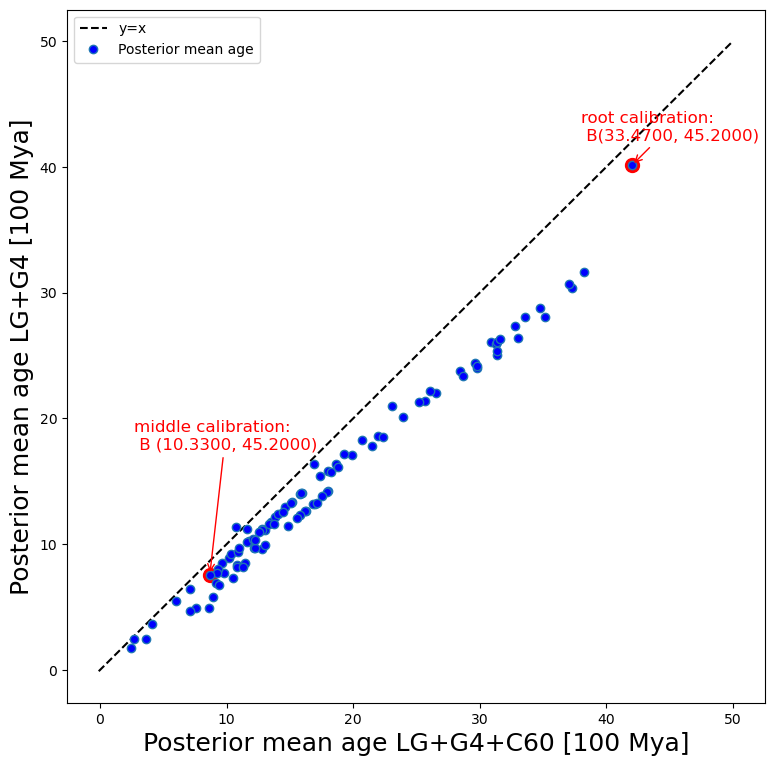

In [66]:
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
points = ax.plot(model1_mean_posterior_times, model2_mean_posterior_times, 'o', label='Posterior mean age')
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[-5], posterior_mean_baseml[-5], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(33.4700, 45.2000)', 
        xy=(model1_mean_posterior_times[0], model2_mean_posterior_times[0]), 
        xytext=(model1_mean_posterior_times[0] -4,  model2_mean_posterior_times[0] + 2),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('middle calibration:\n B (10.3300, 45.2000)', 
        xy=(model1_mean_posterior_times[-5], model2_mean_posterior_times[-5]), 
        xytext=(model1_mean_posterior_times[-5] -6,  model2_mean_posterior_times[-5] + 10),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# Labels and title
ax.set_xlabel('Posterior mean age LG+G4+C60 [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t199 ~ B(10.3300,45.2000)]')
ax.legend()

plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_C60_middle_scatter.png')

In [68]:
model1_mean_posterior_times[-5]

8.6747

In [69]:
model1_mean_posterior_times

array([42.0402, 38.2722, 37.2721, 33.6062, 32.7762, 30.8785, 18.0276,
       17.8981, 17.5181, 17.0262, 16.279 , 12.1621,  3.6367,  9.189 ,
        7.557 , 12.8267, 10.7855, 16.8271, 16.2016,  9.4353, 13.0126,
       10.8627, 11.4285, 15.8383, 14.8839,  4.1057, 17.1827, 15.599 ,
       11.2886, 10.4869,  8.8917, 12.2714,  9.8078,  8.6403, 29.6685,
       23.0583, 31.2794, 28.4637, 26.53  , 20.6819, 17.9946, 15.9548,
       13.4888, 21.9391, 11.608 , 26.0959, 23.9356,  6.0314,  2.7098,
       35.186 , 31.3341, 25.6628, 19.9394, 21.4529, 33.0144, 28.6432,
       29.7883, 37.0866, 34.7696, 31.343 , 10.7571, 31.4045, 29.8229,
       25.1937, 22.3581, 16.8715, 31.5822, 19.3179, 18.6215, 18.2393,
       17.3572, 15.7738, 15.1785, 14.622 , 13.8253, 12.7683, 11.788 ,
       10.187 ,  7.0834, 13.0209, 11.5887, 10.3173, 14.038 , 12.7876,
       12.065 ,  9.6649, 10.8913, 12.5772, 11.0053,  9.2848, 15.0888,
       13.3378, 14.4365, 13.7344, 12.2208,  9.2082,  8.6747,  7.11  ,
        2.4471, 18.8

In [70]:
model2_mean_posterior_times

array([40.1531, 31.6516, 30.3918, 28.0769, 27.3165, 26.0648, 14.2132,
       14.1316, 13.8139, 13.1884, 12.6567,  9.7255,  2.4368,  6.9033,
        4.9004,  9.5972,  8.3134, 13.1631, 12.6484,  6.7772,  9.9598,
        8.1908,  8.5235, 12.2886, 11.4646,  3.6529, 13.3139, 12.0928,
        8.2141,  7.3521,  5.8271,  9.6862,  7.7153,  4.8985, 24.3758,
       21.0249, 25.9066, 23.7658, 22.0359, 18.2641, 15.7953, 14.0417,
       11.7728, 18.6086, 11.1906, 22.1485, 20.1025,  5.4767,  2.4397,
       28.0524, 25.015 , 21.3785, 17.0677, 17.7759, 26.4047, 23.3996,
       24.0447, 30.6757, 28.8066, 25.3461, 11.3574, 26.0694, 24.1977,
       21.3046, 18.5327, 16.3599, 26.2955, 17.1817, 16.3453, 15.7691,
       15.418 , 14.0035, 13.3914, 12.9282, 12.1439, 11.2286, 10.2815,
        8.916 ,  6.4489, 11.1303, 10.1989,  9.2243, 12.3731, 11.133 ,
       10.4031,  8.5406,  9.3631, 11.0065,  9.6819,  8.0317, 13.2682,
       11.6328, 12.5821, 11.5916, 10.3621,  7.7388,  7.5596,  4.7174,
        1.7087, 16.1